
<table width="100%">
<td style="font-size:45px;font-style:italic;text-align:right;background-color:rgba(0, 220, 170,0.7)">
Exercise set IV
</td></table>



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{\ket{ #1}\bra{#2}} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathcal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $
$ \newcommand{\tr}{{\rm Tr}\,} $
$ \newcommand{\boldsig}{\boldsymbol{\sigma}} $
$ \newcommand{\bn}{\boldsymbol{n}}$
$ \newcommand{\boldn}{\boldsymbol{n}} $
$ \newcommand{\Lin}{\hbox{Lin}} $
$ \newcommand{\id}{{\mathbb I}} $

<div class="alert alert-block alert-success">
<b>Exerise 4.1:</b>  
<br>

Suppose that Alice and Bob each use two mutually perpendicular bases $A\perp A'$, and $B\perp B'$, and can rotate them rigidly by an angle $\varphi$ between both sets.
Find the value of the maximum violation of the CHSH inequality in the interval $\varphi \in [0,2\pi]$ (you can use $qiskit$ or do it analytically).

</div>

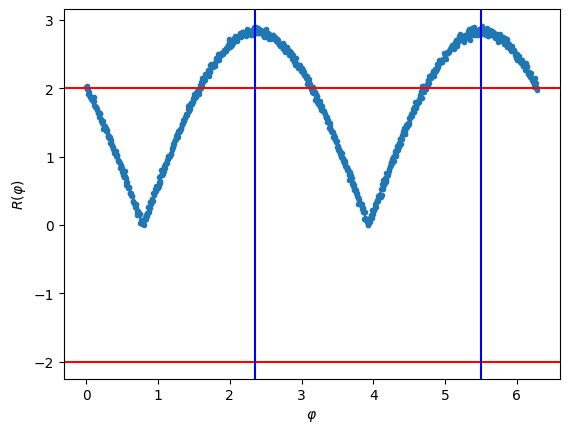

Then, experimentally, the maximum violation is 2.9091796875 with phi values 5.515869383780277


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from math import pi

# Define the number of divisions to make
phi_divs = 1000
phi_list=np.linspace(0,2*np.pi,phi_divs)

# Define C and R just as in the CSHS problem
C=[0,0,0,0]
R=np.zeros(phi_divs)

# Define parameters for the simulation
nshots = 2048
M_simulator = Aer.get_backend('qasm_simulator')

for j in range(phi_divs): 

    # Set angles for the specific value of phi
    phi=phi_list[j] 
    angles_AB=[[phi+pi/2, 0],[phi, 0],[phi+pi/2,pi/2],[phi, pi/2]] # AB , A'B , AB', A'B'

    for i in range(4):        
        # Create the circuit for each pair of angles
        ang_AB=angles_AB[i]
        qc=QuantumCircuit(2,2)

        # Bell pair
        qc.x(0)
        qc.x(1)
        qc.h(0)
        qc.cx(0,1)

        # Define and execute the measurement with the correspondent angle
        qc.rx(-ang_AB[0],0) 
        qc.rx(-ang_AB[1],1)
        qc.measure([0,1],[0,1])
        
        counts=execute(qc,backend = M_simulator,shots = nshots).result().get_counts()         
        C[i]= 0 
        for bitstring, counts in counts.items():
            C[i] += (-1)**(sum([int(bit) for bit in bitstring])) * counts/nshots 

    # Calculate R value
    R[j]=np.abs(C[0]+C[1]+C[2]-C[3])

# Analytic function constructed in pdf attached and plotted
fx= 2*np.abs(np.cos(phi_list) - np.sin(phi_list))
plt.plot(phi_list,fx,'k-',linewidth=1)

# Plot simulated values of R
plt.plot(phi_list,R,'.')
plt.axhline(y = 2, color = 'r', linestyle = '-')
plt.axhline(y = -2, color = 'r', linestyle = '-')

# Lines for the maximum calculated analytically
plt.axvline(x = 3*np.pi/4, color = 'b', linestyle = '-')
plt.axvline(x = 7*np.pi/4, color = 'b', linestyle = '-')
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$R(\varphi)$')
plt.show()

# Cálculo del valor de máxima violación
maximum = np.nanmax(R)
index = np.argmax(R)
print("Then, experimentally, the maximum violation is {} with phi values {}".format(maximum, phi_list[index]))

<div class="alert alert-block alert-success">
<b>Exercise 4.2:</b> 

a) By evolving the initial state show that the following circuit indeed creates a $\ket{B_{00}}_{AC}$ Bell state between $A$ and $C$.   
<br>
<br>
    
<div>
<img src="ent_swap.png" width="30%" style="margin:auto"/>
 
b) Complete the circuit to teleport a state $\ket{\psi}$ from $A$ to  $C$. Code the final circuit in $qiskit$ and show it works. 
 
</div>

a) RESULTS


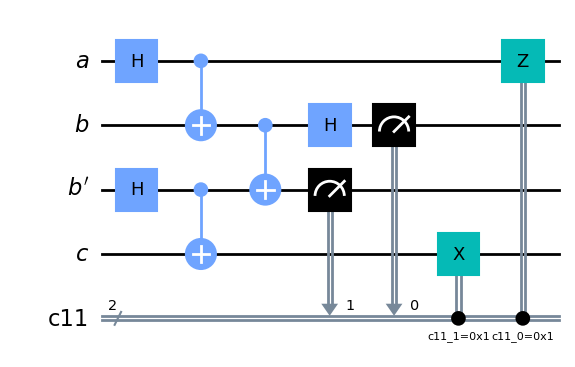

<IPython.core.display.Latex object>

b) RESULTS


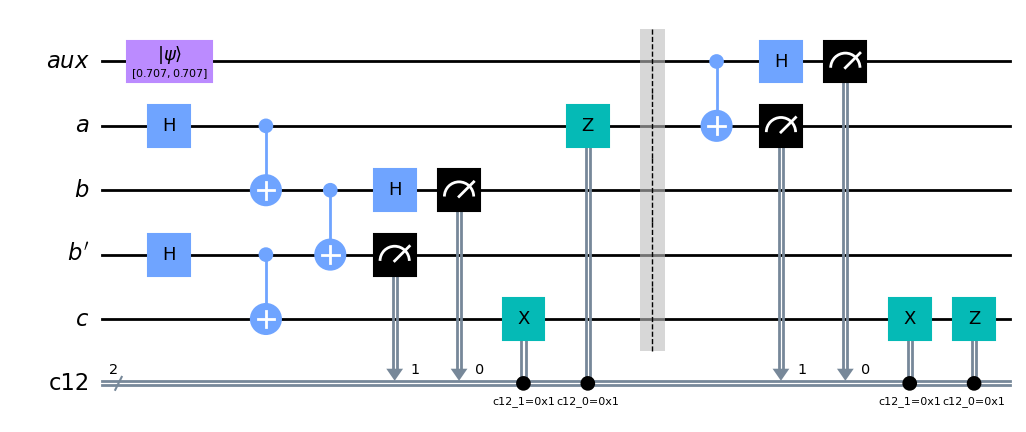

<IPython.core.display.Latex object>

In [11]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, transpile, assemble
import math

def common_circuit():
    # Quantum and classical registers: def of circuit
    qrA = QuantumRegister(1, "a")
    qrB = QuantumRegister(1, "b")
    qrB_ = QuantumRegister(1, "b'")
    qrC = QuantumRegister(1, "c")
    qrlist = [qrA, qrB, qrB_, qrC]
    
    cr = ClassicalRegister(2)
    
    qc = QuantumCircuit(*qrlist, cr)
    
    # Entangler in AB
    qc.h(qrA)
    qc.cx(qrA, qrB)
    
    # Entangler in B'C
    qc.h(qrB_)
    qc.cx(qrB_, qrC)
    
    # Disentangler in BB'
    qc.cx(qrB, qrB_)
    qc.h(qrB)
    
    # Measure to conditionally apply Z and X gates over a and c registers, respectively
    qc.measure([qrB[0], qrB_[0]], cr)
    qc.z(qrA[0]).c_if(cr[0], 1)
    qc.x(qrC[0]).c_if(cr[1], 1)

    return (qc, qrlist, cr)

""" APARTADO a) """
(qc, qrlist, cr) = common_circuit()

# Use the statevector simulator to show that the state is B_00 on a and c
print("a) RESULTS")
S_simulator = Aer.get_backend('statevector_simulator')
statevector = S_simulator.run(assemble(transpile(qc, S_simulator))).result().get_statevector()
display(qc.draw('mpl'))
display(statevector.draw('latex'))

""" APARTADO b) """
print("b) RESULTS")
(qc_common, qrlist, cr) = common_circuit()

# Initialize a auxiliar qubit with the state to teleport and add it to the previous circuit
qraux = QuantumRegister(1, "aux")
qrlist = [qraux, *qrlist]
qc = QuantumCircuit(*qrlist, cr)
psi = [1/math.sqrt(2), 1/math.sqrt(2)]
qc.initialize(psi, qraux)
qc.compose(qc_common, [qr[0] for qr in qrlist[1:]], inplace = True)
qc.barrier()

# Execute a teleport protocol
[qrA, qrB, qrB_, qrC] = qrlist[1:]
qc.cx(qraux, qrA)
qc.h(qraux)
qc.measure([qraux[0], qrA[0]], cr)
qc.x(qrC[0]).c_if(cr[1], 1)
qc.z(qrC[0]).c_if(cr[0], 1)

# Show the final result
S_simulator = Aer.get_backend('statevector_simulator')
statevector = S_simulator.run(assemble(transpile(qc, S_simulator))).result().get_statevector()
display(qc.draw('mpl'))
display(statevector.draw('latex'))

<div class="alert alert-block alert-success">
<b>Exercise 4.3:</b> 

Write a function  $partial\_traces(rho,dA,dB)$ that receives a density matrix $\rho$ and two integers $d_A, d_B$ the dimensions of ${\cal H}_A$ and ${\cal H}_B$ such that $d_A d_B = d$, the dimension of  ${\cal H} = {\cal H}_A\otimes {\cal H}_B$.  The function returns the two density matrices $\rho_A$ and $\rho_B$ obtained through partial traces. 

Verify the result with the matrix  $\rho=\ketbra{\psi}{\psi}$ where $\ket{\psi} = \frac{1}{\sqrt{2}}(\ket{e_1}\ket{e_2} - \ket{e_2}\ket{e_1})$.  
  
</div>

In [3]:
import numpy as np
import math

def partial_traces(rho, dA, dB):
    # Check if the dimensions are compatible with the input density matrix
    d = dA * dB
    if rho.shape != (d, d):
        raise ValueError("The dimensions do not match the shape of the input density matrix.")

    # Calculate the partial trace over subsystem A
    rho_A = np.zeros((dA, dA), dtype=complex)
    for i in range(dA):
        for j in range(dA):
            for k in range(dB):
                rho_A[i, j] += rho[i * dB + k, j * dB + k]

    # Calculate the partial trace over subsystem B
    rho_B = np.zeros((dB, dB), dtype=complex)
    for i in range(dB):
        for j in range(dB):
            for k in range(dA):
                rho_B[i, j] += rho[k * dB + i, k * dB + j]

    return rho_A, rho_B

# Define the density matrix for the given example
def ket_bra(u, v):
    """Compute the outer product of two statevectors u and v."""
    return [[u_i * complex(v_j.real, -v_j.imag) for v_j in v] for u_i in u]

# Example usage:
psi = [0, 1/math.sqrt(2), -1/math.sqrt(2), 0]
rho_example = np.array(ket_bra(psi, psi))

# Dimensions of the subsystems
dA_example = 2
dB_example = 2

# Compute partial traces
rho_A_example, rho_B_example = partial_traces(rho_example, dA_example, dB_example)

print("Density matrix of the system (rho):")
print(rho_example)
print("\nPartial Trace over Subsystem A (rho_A):")
print(rho_A_example)
print("\nPartial Trace over Subsystem B (rho_B):")
print(rho_B_example)
    

Density matrix of the system (rho):
[[ 0. +0.j  0. +0.j  0. -0.j  0. +0.j]
 [ 0. +0.j  0.5+0.j -0.5-0.j  0. +0.j]
 [-0. +0.j -0.5+0.j  0.5+0.j -0. +0.j]
 [ 0. +0.j  0. +0.j  0. -0.j  0. +0.j]]

Partial Trace over Subsystem A (rho_A):
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]

Partial Trace over Subsystem B (rho_B):
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]


 <div class="alert alert-block alert-success">
<b>Exercise 4.4:</b> 

Consider the 3-qubit  state $\ket{\psi} =  \hbox{CNOT}(1,0)\hbox{CNOT}(0,2)H(1) R_x(\alpha,0)\ket{000}$
with $\alpha = \pi/3$. Let the qubits 01 span subsystem $A$, and 2 the subsystem $B$.
    
- Compute the partial traces $\rho_B =\tr_{01}\rho $ and $\rho_A =\tr_{2}\rho~$ where $\rho = \ket{\psi}\bra{\psi}$. Obtain their purity.
<br>    
    
- experimentally compute $\langle  Z_2\rangle_\psi = \langle I\otimes I\otimes   Z\rangle_\psi $ and compare it with the prediction $\tr (Z\cdot\rho_B)$
<br>

- experimentally compute $\langle Z_0Z_1 \rangle_\psi $ and compare it with the prediction $\tr (Z \otimes Z\cdot \rho_{A})$
<br>    

- Repeat for $\langle X_2\rangle_\psi$  and $\langle Z_0X_1\rangle_\psi$ 

Note: you can chose to do the exercise either manually or using $qiskit$, or bothways.

</div>

 <div class="alert alert-block">

- Compute the partial traces $\rho_B =\tr_{01}\rho $ and $\rho_A =\tr_{2}\rho~$ where $\rho = \ket{\psi}\bra{\psi}$. Obtain their purity.
  
</div>

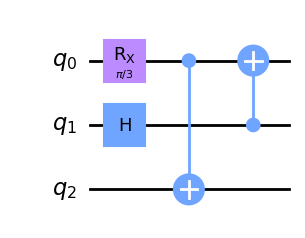

Density Matrix:
 [[0.375+0.j         0.   +0.j         0.   +0.j         0.375+0.j
  0.   +0.j         0.   +0.21650635j 0.   +0.21650635j 0.   +0.j        ]
 [0.   +0.j         0.   +0.j         0.   +0.j         0.   +0.j
  0.   +0.j         0.   +0.j         0.   +0.j         0.   +0.j        ]
 [0.   +0.j         0.   +0.j         0.   +0.j         0.   +0.j
  0.   +0.j         0.   +0.j         0.   +0.j         0.   +0.j        ]
 [0.375+0.j         0.   +0.j         0.   +0.j         0.375+0.j
  0.   +0.j         0.   +0.21650635j 0.   +0.21650635j 0.   +0.j        ]
 [0.   +0.j         0.   +0.j         0.   +0.j         0.   +0.j
  0.   +0.j         0.   +0.j         0.   +0.j         0.   +0.j        ]
 [0.   -0.21650635j 0.   -0.j         0.   -0.j         0.   -0.21650635j
  0.   -0.j         0.125+0.j         0.125+0.j         0.   -0.j        ]
 [0.   -0.21650635j 0.   -0.j         0.   -0.j         0.   -0.21650635j
  0.   -0.j         0.125+0.j         0.125+0.j        

In [52]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import partial_trace
import numpy as np

def qc_exercise4(cr = False):
    # Define the parameters
    alpha = np.pi / 3

    # Create a 3-qubit quantum circuit
    if cr:
        qc = QuantumCircuit(3, 3)
    else:
        qc = QuantumCircuit(3)

    # Apply the Rx gate with parameter alpha to qubit 0
    qc.rx(alpha, 0)

    # Apply CNOT gates and Hadamard gate
    qc.h(1)
    qc.cx(0, 2)
    qc.cx(1, 0)

    return qc

qc = qc_exercise4()
display(qc.draw('mpl'))

# Compute the density matrix
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
statevector = np.asarray(job.result().get_statevector())
rho = np.outer(statevector, statevector.conj())

# Calculate the reduced density matrices
rho_A = np.matrix(partial_trace(statevector, [2]))
rho_B = np.matrix(partial_trace(statevector, [0,1]))

# Compute purity
purity_A = np.trace(np.dot(rho_A, rho_A))
purity_B = np.trace(np.dot(rho_B, rho_B))

print("Density Matrix:\n", rho)
print("\nReduced Density Matrix (A):\n", rho_A)
print("\nReduced Density Matrix (B):\n", rho_B)
print("\nPurity of rho_A:", "{:.3f}".format(purity_A.real))
print("Purity of rho_B:", "{:.3f}".format(purity_B.real))

 <div class="alert alert-block">

- experimentally compute $\langle  Z_2\rangle_\psi = \langle I\otimes I\otimes   Z\rangle_\psi $ and compare it with the prediction $\tr (Z\cdot\rho_B)$  
</div>

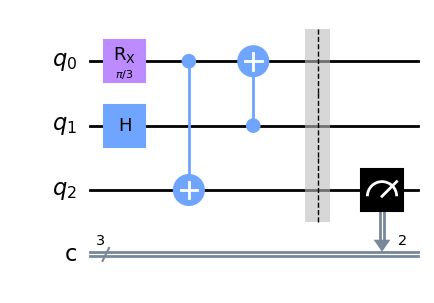

{'100': 25054, '000': 74946}
<Z_2> = <ZII> = 0.49892
Tr(Z·rho_B) = 0.5


In [41]:
# Define the function to measure in Pauli String
def add_multimeasure_XYZ(circuit, paulistring):

    assert(circuit.num_qubits==len(paulistring)) #check whether width of circuit coincides with length of Pauli string

    for i, basis in enumerate(reversed(paulistring)):
        if  basis == 'X':
            circuit.h(i)    
            circuit.measure(i, i)
        elif basis == 'Z':
            circuit.measure(i, i)
            pass    
        elif basis == 'Y':
            circuit.sdg(i)
            circuit.h(i)
            circuit.measure(i, i)

    return circuit

""" CALCULATE <Z_2> """
# Take qc from previous exercise
qc = qc_exercise4(cr = True)
qc.barrier()

# Add the correspondent measurements
qc = add_multimeasure_XYZ(qc, "ZII")
display(qc.draw('mpl'))

# Execute and calculate the expentacion value
M_backend = Aer.get_backend('qasm_simulator')
shots=100000
counts = execute(qc,M_backend,shots=shots).result().get_counts()
print(counts)

mean = 0
for bitstring, count in counts.items():
    mean += (-1)**(sum([int(bit) for bit in bitstring])) * count/shots 

print('<Z_2> = <ZII> =', np.round(mean, 5))

""" CALCULATE Tr(Z·rho_B) """
Z=np.matrix([[1, 0],[0, -1]])

result = np.trace(np.dot(Z, rho_B))
print("Tr(Z·rho_B) =", np.round(result.real, 5))

 <div class="alert alert-block">

- experimentally compute $\langle Z_0Z_1 \rangle_\psi $ and compare it with the prediction $\tr (Z \otimes Z\cdot \rho_{A})$
</div>

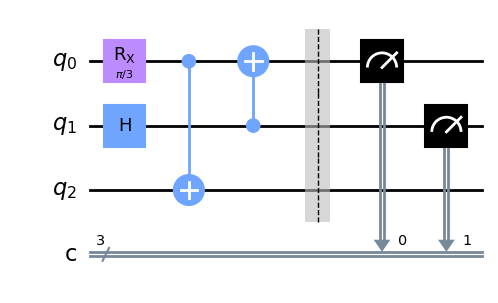

{'001': 12458, '011': 37435, '010': 12463, '000': 37644}
<Z_0Z_1> = <IZZ> = 0.50158
Tr(ZxZ·rho_A) = 0.5


In [43]:
""" CALCULATE <Z_0Z_1> """
# Take qc from previous exercise
qc = qc_exercise4(cr = True)
qc.barrier()

# Add the correspondent measurements
qc = add_multimeasure_XYZ(qc, "IZZ")
display(qc.draw('mpl'))

# Execute and calculate the expentacion value
M_backend = Aer.get_backend('qasm_simulator')
shots=100000
counts = execute(qc,M_backend,shots=shots).result().get_counts()
print(counts)

mean = 0
for bitstring, count in counts.items():
    mean += (-1)**(sum([int(bit) for bit in bitstring])) * count/shots 

print('<Z_0Z_1> = <IZZ> =', np.round(mean, 5))

""" CALCULATE Tr(ZxZ·rho_A) """
Z=np.matrix([[1, 0],[0, -1]])

result = np.trace(np.dot(np.kron(Z, Z), rho_A))
print("Tr(ZxZ·rho_A) =", np.round(result.real, 5))

 <div class="alert alert-block">

- Repeat for $\langle X_2\rangle_\psi$  and $\langle Z_0X_1\rangle_\psi$ 

</div>

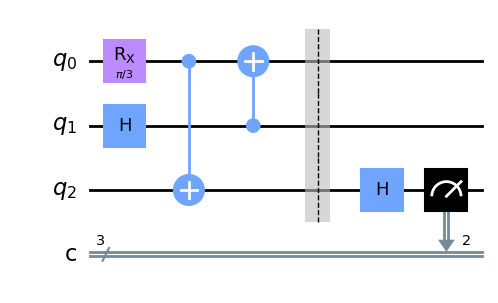

{'100': 50172, '000': 49828}
<X_2> = <XII> = -0.00344
Tr(X·rho_B) = 0.0


In [45]:
""" ------------ FOR <X_2> ------------"""
""" CALCULATE <X_2> """
# Take qc from previous exercise
qc = qc_exercise4(cr = True)
qc.barrier()

# Add the correspondent measurements
qc = add_multimeasure_XYZ(qc, "XII")
display(qc.draw('mpl'))

# Execute and calculate the expentacion value
M_backend = Aer.get_backend('qasm_simulator')
shots=100000
counts = execute(qc,M_backend,shots=shots).result().get_counts()
print(counts)

mean = 0
for bitstring, count in counts.items():
    mean += (-1)**(sum([int(bit) for bit in bitstring])) * count/shots 

print('<X_2> = <XII> =', np.round(mean, 5))

""" CALCULATE Tr(X·rho_B) """
X=np.matrix([[0, 1],[1, 0]])

result = np.trace(np.dot(X, rho_B))
print("Tr(X·rho_B) =", np.round(result.real, 5))

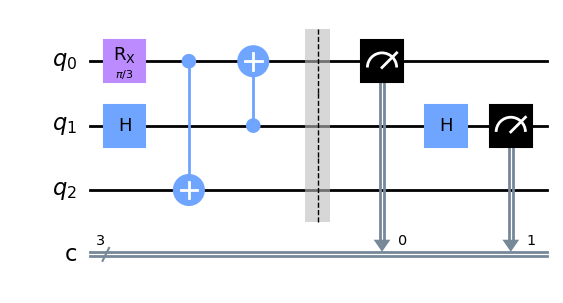

{'011': 24881, '010': 25165, '000': 24907, '001': 25047}
<Z_0X_1> = <IXZ> = -0.00424
Tr(XxZ·rho_A) = 0.0


In [48]:
""" ------------ FOR <Z_0X_1> ------------"""
""" CALCULATE <Z_0X_1> """
# Take qc from previous exercise
qc = qc_exercise4(cr = True)
qc.barrier()

# Add the correspondent measurements
qc = add_multimeasure_XYZ(qc, "IXZ")
display(qc.draw('mpl'))

# Execute and calculate the expentacion value
M_backend = Aer.get_backend('qasm_simulator')
shots=100000
counts = execute(qc,M_backend,shots=shots).result().get_counts()
print(counts)

mean = 0
for bitstring, count in counts.items():
    mean += (-1)**(sum([int(bit) for bit in bitstring])) * count/shots 

print('<Z_0X_1> = <IXZ> =', np.round(mean, 5))

""" CALCULATE Tr(XxZ·rho_A) """
X=np.matrix([[0, 1],[1, 0]])
Z=np.matrix([[1, 0],[0, -1]])

result = np.trace(np.dot(np.kron(X, Z), rho_A))
print("Tr(XxZ·rho_A) =", np.round(result.real, 5))